In [23]:
import pandas as pd
import geopandas as gp
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('max_columns',500)

In [81]:
edd15 = gp.read_file('E:\Transit-Casa-Alex\Input\EDD\EDD_SF_JOBS_2009-2015\SF_JOBS_2009-2015/SF_JOBS_2015_Q4.shp')
edd14 = gp.read_file('E:\Transit-Casa-Alex\Input\EDD\EDD_SF_JOBS_2009-2015\SF_JOBS_2009-2015/SF_JOBS_2014_Q4.shp')
edd09 = gp.read_file('E:\Transit-Casa-Alex\Input\EDD\EDD_SF_JOBS_2009-2015\SF_JOBS_2009-2015/SF_JOBS_2009_Q4.shp')

In [7]:
edd15.head()

,Landuse,Q4_AVG,geometry,latitude,longitude,month1Empl,month2Empl,month3Empl,naics,quarter,year
0,PDR,4,POINT (-122.399621 37.794498),37.794498,-122.399621,3,4,4,491110,4,2015
1,PDR,2,POINT (-122.428266 37.772318),37.772318,-122.428266,2,1,2,491110,4,2015
2,PDR,4,POINT (-122.416618 37.753977),37.753977,-122.416618,4,4,4,491110,4,2015
3,PDR,1605,POINT (-122.382437 37.739746),37.739746,-122.382437,1573,1565,1677,491110,4,2015
4,PDR,2,POINT (-122.480139 37.763121),37.763121,-122.480139,2,2,2,491110,4,2015


In [8]:
edd14.head()

,Landuse,Q4_AVG,geometry,latitude,longitude,month1Empl,month2Empl,month3Empl,naics,quarter,year
0,PDR,3,POINT (-122.399621 37.794498),37.794498,-122.399621,4,3,3,491110,4,2014
1,PDR,3,POINT (-122.428266 37.772318),37.772318,-122.428266,3,3,3,491110,4,2014
2,PDR,4,POINT (-122.416618 37.753977),37.753977,-122.416618,4,4,4,491110,4,2014
3,PDR,1604,POINT (-122.382745 37.73993),37.739930,-122.382745,1582,1597,1634,491110,4,2014
4,PDR,2,POINT (-122.480139 37.763121),37.763121,-122.480139,2,2,2,491110,4,2014


In [9]:
blocks = gp.read_file('E:/Transit-Casa-Alex/Output/Census Block Data/Census_Block_Data.shp')

In [11]:
blocks.crs = {'init':'epsg:4269'}

In [13]:
edd15 = edd15.to_crs(blocks.crs)

In [14]:
edd14 = edd14.to_crs(blocks.crs)

In [17]:
emp14 = gp.sjoin(blocks,edd14[['geometry','Q4_AVG']],how = 'left')

In [18]:
emp15 = gp.sjoin(blocks,edd15[['geometry','Q4_AVG']],how = 'left')

In [41]:
diff14 = emp14[['BLOCK_ID','Q4_AVG','EMP_WAC']].groupby(by= 'BLOCK_ID',as_index = False).agg({'EMP_WAC':'first',
                                                                                              'Q4_AVG':'sum'})

In [42]:
diff14.head()

,BLOCK_ID,EMP_WAC,Q4_AVG
0,6.075010e+13,793.0,300.0
1,6.075010e+13,408.0,326.0
2,6.075010e+13,131.0,405.0
3,6.075010e+13,140.0,184.0
4,6.075010e+13,281.0,522.0


In [43]:
diff14.BLOCK_ID[1]

60750101001004.0

In [44]:
diff14['DIFF'] = diff14['Q4_AVG'] - diff14['EMP_WAC']

In [45]:
diff14.head()

,BLOCK_ID,EMP_WAC,Q4_AVG,DIFF
0,6.075010e+13,793.0,300.0,-493.0
1,6.075010e+13,408.0,326.0,-82.0
2,6.075010e+13,131.0,405.0,274.0
3,6.075010e+13,140.0,184.0,44.0
4,6.075010e+13,281.0,522.0,241.0


In [46]:
min(diff14.DIFF)

-18596.0

In [61]:
max(diff14.DIFF)

15642.0

In [56]:
counts = diff14.DIFF.value_counts()

In [ ]:
diff14.DIFF.value_counts().sort

In [48]:
max(diff14.EMP_WAC)

20035.0

In [49]:
max(blocks.EMP_WAC)

20035.0

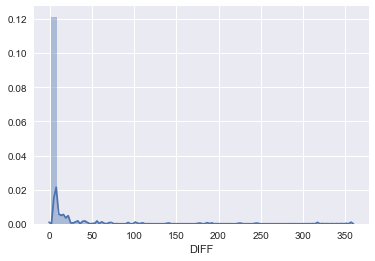

In [60]:
sns.distplot(counts)

In [70]:
np.percentile(counts,99)

181.94999999999959

In [68]:
np.percentile(counts,95)

31.0

In [72]:
emp09.head()

,Landuse,NAICS,Q4AVG,geometry,latitude,longitude,month1empl,month2empl,month3empl,quarter,year
0,PDR,491110,8,POINT (-122.40005 37.794474),37.794474,-122.400050,8,8,8,4,2009
1,PDR,491110,6,POINT (-122.415716 37.78178),37.781780,-122.415716,6,6,5,4,2009
2,PDR,491110,6,POINT (-122.4166 37.754113),37.754113,-122.416600,7,6,6,4,2009
3,PDR,491110,125,POINT (-122.476051 37.752254),37.752254,-122.476051,133,122,120,4,2009
4,PDR,491110,2213,POINT (-122.38219 37.739735),37.739735,-122.382190,2352,2220,2068,4,2009


In [112]:
lehd09 = gp.read_file('E:/Transit-Casa-Alex/Input/LEHD Census Blocks/2009/San Francisco County/075_Employment.shp')

In [113]:
lehd14 = gp.read_file('E:/Transit-Casa-Alex/Input/LEHD Census Blocks/2014/San Fran/075_Employment.shp')

In [114]:
lehd09.crs = {'init':'epsg:4269'}

In [115]:
lehd14.crs = {'init':'epsg:4269'}

In [116]:
edd09 = edd09.to_crs(lehd09.crs)

In [117]:
edd14 = edd15.to_crs(lehd14.crs)

In [118]:
emp09 = gp.sjoin(lehd09,edd09[['geometry','Q4AVG']],how = 'left')

In [119]:
emp14 = gp.sjoin(lehd14,edd14[['geometry','Q4_AVG']],how = 'left')

In [120]:
emp09.head()

,ALAND10,AWATER10,BLOCKCE10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,RETAIL_RAC,RETAIL_WAC,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,createda_1,createdate,geometry,h_geocode,w_geocode,index_right,Q4AVG
0,16958,0,2002,6.075021e+13,075,16.0,7.0,61.0,7.0,S,2147483647,+37.7500665,-122.4410751,6.0,0.0,G5040,Block 2002,34.0,0.0,5.0,0.0,06,021300,78904,U,U,20160228.0,20160228.0,"POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,21470.0,5.0
0,16958,0,2002,6.075021e+13,075,16.0,7.0,61.0,7.0,S,2147483647,+37.7500665,-122.4410751,6.0,0.0,G5040,Block 2002,34.0,0.0,5.0,0.0,06,021300,78904,U,U,20160228.0,20160228.0,"POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,48153.0,1.0
0,16958,0,2002,6.075021e+13,075,16.0,7.0,61.0,7.0,S,2147483647,+37.7500665,-122.4410751,6.0,0.0,G5040,Block 2002,34.0,0.0,5.0,0.0,06,021300,78904,U,U,20160228.0,20160228.0,"POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,22732.0,0.0
0,16958,0,2002,6.075021e+13,075,16.0,7.0,61.0,7.0,S,2147483647,+37.7500665,-122.4410751,6.0,0.0,G5040,Block 2002,34.0,0.0,5.0,0.0,06,021300,78904,U,U,20160228.0,20160228.0,"POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,48006.0,1.0
1,16823,0,2000,6.075021e+13,075,19.0,0.0,79.0,1.0,S,2147483647,+37.7501958,-122.4389330,9.0,0.0,G5040,Block 2000,45.0,1.0,6.0,0.0,06,021300,78904,U,U,20160228.0,20160228.0,"POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,22820.0,0.0


In [121]:
emp14.head()

,ALAND10,AWATER10,BLOCKCE10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,EMP_WAC,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,LEISER_RAC,LEISER_WAC,MTFCC10,NAME10,OTHER_RAC,OTHER_WAC,RETAIL_RAC,RETAIL_WAC,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,createda_1,createdate,geometry,h_geocode,w_geocode,index_right,Q4_AVG
0,16958,0,2002,6.075021e+13,075,14.0,6.0,63.0,6.0,S,2147483647,+37.7500665,-122.4410751,6.0,0.0,G5040,Block 2002,41.0,0.0,2.0,0.0,06,021300,78904,U,U,20160219.0,20160219.0,"POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,44737.0,5.0
1,16823,0,2000,6.075021e+13,075,10.0,0.0,57.0,5.0,S,2147483647,+37.7501958,-122.4389330,5.0,0.0,G5040,Block 2000,39.0,5.0,3.0,0.0,06,021300,78904,U,U,20160219.0,20160219.0,"POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,50428.0,2.0
1,16823,0,2000,6.075021e+13,075,10.0,0.0,57.0,5.0,S,2147483647,+37.7501958,-122.4389330,5.0,0.0,G5040,Block 2000,39.0,5.0,3.0,0.0,06,021300,78904,U,U,20160219.0,20160219.0,"POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,52189.0,1.0
1,16823,0,2000,6.075021e+13,075,10.0,0.0,57.0,5.0,S,2147483647,+37.7501958,-122.4389330,5.0,0.0,G5040,Block 2000,39.0,5.0,3.0,0.0,06,021300,78904,U,U,20160219.0,20160219.0,"POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,21494.0,0.0
1,16823,0,2000,6.075021e+13,075,10.0,0.0,57.0,5.0,S,2147483647,+37.7501958,-122.4389330,5.0,0.0,G5040,Block 2000,39.0,5.0,3.0,0.0,06,021300,78904,U,U,20160219.0,20160219.0,"POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,52660.0,1.0


In [122]:
diff14 = emp14[['BLOCK_ID','Q4_AVG','EMP_WAC']].groupby(by= 'BLOCK_ID',as_index = False).agg({'EMP_WAC':'first',
                                                                                              'Q4_AVG':'sum'})

In [125]:
diff09 = emp09[['BLOCK_ID','Q4AVG','EMP_WAC']].groupby(by= 'BLOCK_ID',as_index = False).agg({'EMP_WAC':'first',
                                                                                              'Q4AVG':'sum'})

In [126]:
diff14['DIFF'] = diff14['Q4_AVG'] - diff14['EMP_WAC']

In [128]:
diff09['DIFF'] = diff09['Q4AVG'] - diff09['EMP_WAC']

In [129]:
max(diff14.DIFF)

15744.0

In [140]:
max(diff09.DIFF)

11776.0

In [143]:
min(diff14.DIFF)

-21471.0

In [144]:
min(diff09.DIFF)

-18893.0

In [145]:
count14 = diff14.DIFF.value_counts()

In [146]:
diff14.DIFF.value_counts().sort

<bound method Series.sort of  0.0       525
-1.0       427
 1.0       330
-2.0       283
 2.0       236
-3.0       179
 3.0       166
 4.0       129
-4.0       119
-5.0       105
 5.0       104
-6.0        89
 6.0        88
-8.0        68
 7.0        66
 8.0        60
-7.0        54
 9.0        48
 13.0       45
-11.0       42
-9.0        41
-13.0       41
 11.0       37
 12.0       33
-10.0       32
 10.0       32
-12.0       28
-14.0       28
-16.0       27
-18.0       27
          ... 
 687.0       1
-557.0       1
-367.0       1
 81.0        1
 203.0       1
-150.0       1
 297.0       1
-537.0       1
-84.0        1
-400.0       1
 109.0       1
-204.0       1
-124.0       1
-94.0        1
-216.0       1
 212.0       1
-380.0       1
 78.0        1
-200.0       1
 86.0        1
-184.0       1
 74.0        1
-304.0       1
 61.0        1
 55.0        1
 100.0       1
-248.0       1
-608.0       1
-136.0       1
 3118.0      1
Name: DIFF, dtype: int64>

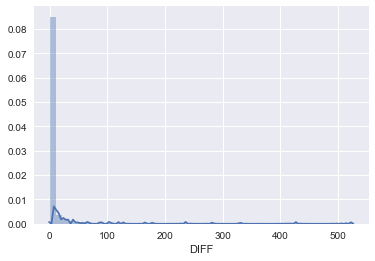

In [150]:
sns.distplot(count14)

In [155]:
np.percentile(counts,99)

186.40999999999974

In [137]:
count09 = diff09.DIFF.value_counts()

In [139]:
diff09.DIFF.value_counts().sort

<bound method Series.sort of  0.0        738
-1.0        576
-2.0        347
 1.0        333
-3.0        220
 2.0        196
-4.0        147
 3.0        130
-5.0        114
-6.0         85
 4.0         83
 5.0         72
-7.0         71
-8.0         60
 6.0         50
-9.0         49
 8.0         41
 7.0         36
 9.0         35
-12.0        33
-13.0        32
-11.0        32
-10.0        29
-14.0        25
-18.0        24
-15.0        23
-17.0        22
-19.0        22
 11.0        21
 14.0        21
           ... 
 1897.0       1
-342.0        1
-151.0        1
 692.0        1
 494.0        1
-163.0        1
-362.0        1
-175.0        1
-443.0        1
-377.0        1
 108.0        1
-92.0         1
 232.0        1
-232.0        1
 346.0        1
 342.0        1
 311.0        1
-171.0        1
-159.0        1
-106.0        1
 79.0         1
-146.0        1
 100.0        1
 94.0         1
 136.0        1
 98.0         1
 164.0        1
 29.0         1
 11776.0      1
-103.0     

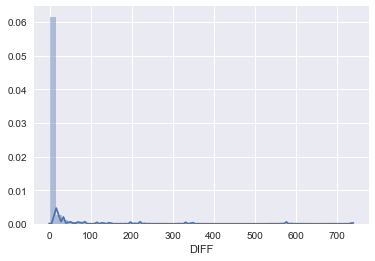

In [156]:
sns.distplot(count09)

In [158]:
emp14.to_file('Emp14_Diff.shp')

In [159]:
emp09.to_file('Emp09_Diff.shp')